In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

# Features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(537, 8)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])  # Accuracy metric

In [ ]:
history = model.fit(X_train, y_train, epochs=55, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/55
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3787 - loss: 0.7856 - val_accuracy: 0.4459 - val_loss: 0.7688
Epoch 2/55
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5178 - loss: 0.7379 - val_accuracy: 0.5671 - val_loss: 0.7363
Epoch 3/55
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6024 - loss: 0.7225 - val_accuracy: 0.6320 - val_loss: 0.7104
Epoch 4/55
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 0.6827 - val_accuracy: 0.6407 - val_loss: 0.6915
Epoch 5/55
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6447 - loss: 0.6671 - val_accuracy: 0.6407 - val_loss: 0.6756
Epoch 6/55
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6174 - loss: 0.6700 - val_accuracy: 0.6320 - val_loss: 0.6615
Epoch 7/55
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6556 - loss: 0.6378 - val_accuracy: 0.6494 - val_loss: 0.6473
Epoch 8/55
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6507 - loss: 0.6203 - val_accuracy: 0.6623 - val_loss

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on test data: {accuracy * 100:.2f}%')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7489 - loss: 0.5308 
Accuracy on test data: 75.76%


In [ ]:
y_pred

array([[0.31442863],
       [0.05923116],
       [0.0535971 ],
       [0.19125286],
       [0.48194814],
       [0.5269788 ],
       [0.03069644],
       [0.63338614],
       [0.81243265],
       [0.3010418 ],
       [0.19471805],
       [0.65408903],
       [0.23580652],
       [0.80196327],
       [0.04831844],
       [0.34402138],
       [0.0523061 ],
       [0.0396256 ],
       [0.8230802 ],
       [0.66368145],
       [0.24801141],
       [0.04565106],
       [0.17190301],
       [0.04116197],
       [0.5383041 ],
       [0.82985574],
       [0.07658943],
       [0.03552918],
       [0.0567133 ],
       [0.14279787],
       [0.88369715],
       [0.77640325],
       [0.87908804],
       [0.74497145],
       [0.86929584],
       [0.8826131 ],
       [0.8278969 ],
       [0.36362052],
       [0.28451174],
       [0.83570206],
       [0.041895  ],
       [0.29206175],
       [0.5900511 ],
       [0.18575956],
       [0.0346161 ],
       [0.6618485 ],
       [0.893715  ],
       [0.088

In [ ]:
# Instead of:
# actual_labels = np.argmax(y_test, axis=1)

# Use this to get the predicted labels:
predicted_labels = (y_pred > 0.5).astype(int).flatten()  # Assuming 0.5 as the threshold

# y_test already contains the actual labels, so you can directly use it:
actual_labels = y_test

print("Predicted labels:")
print(predicted_labels)
print("Actual labels:")
print(actual_labels)

Predicted labels:
[0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
Actual labels:
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0]


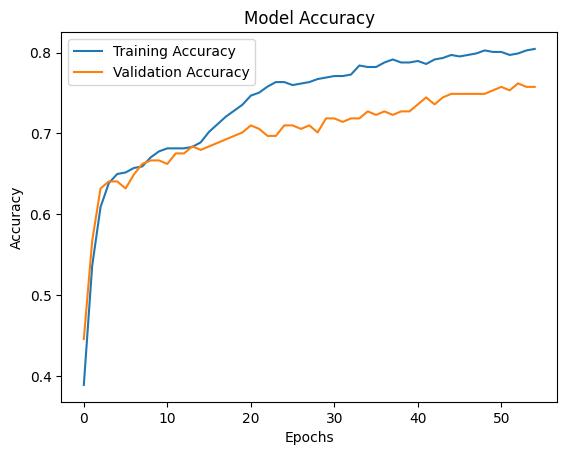

In [ ]:
# You can also plot the training history if needed
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
